In [39]:
from astropy.io import fits
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

# Charger les fichiers FITS
file_f150w2 = 'F150W2/JWST/jw01074-o009_t002_nircam_f150w2-f162m-sub160p/jw01074-o009_t002_nircam_f150w2-f162m-sub160p_i2d.fits'
file_f277w = 'F200_F277/JWST/jw01080-o006_t006_niriss_clearp-f277w-sub128/jw01080-o006_t006_niriss_clearp-f277w-sub128_i2d.fits'
file_f444w = 'F444_F277/JWST/jw01080-o006_t006_niriss_clearp-f444w-sub128/jw01080-o006_t006_niriss_clearp-f444w-sub128_i2d.fits'

# Charger les données FITS
data_f150w2 = fits.getdata(file_f150w2)
data_f277w = fits.getdata(file_f277w)
data_f444w = fits.getdata(file_f444w)

print(data_f150w2.shape, data_f277w.shape, data_f444w.shape)

target_shape = (min(data_f150w2.shape[0], data_f277w.shape[0], data_f444w.shape[0]),
                min(data_f150w2.shape[1], data_f277w.shape[1], data_f444w.shape[1]))

data_f150w2_resized = resize(data_f150w2, target_shape, mode='reflect')
data_f277w_resized = resize(data_f277w, target_shape, mode='reflect')
data_f444w_resized = resize(data_f444w, target_shape, mode='reflect')

print(data_f444w_resized.shape, data_f277w_resized.shape, data_f150w2_resized.shape)


# Créer une image en fausses couleurs en combinant les données avec les filtres
image_rgb = np.stack([data_f444w_resized, data_f277w_resized, data_f150w2_resized], axis=-1)

# Normaliser les données pour une meilleure visualisation
image_rgb = (image_rgb - np.min(image_rgb)) / (np.max(image_rgb) - np.min(image_rgb))

print(image_rgb.shape)


(183, 182) (135, 134) (136, 134)
(135, 134) (135, 134) (135, 134)
(135, 134, 3)


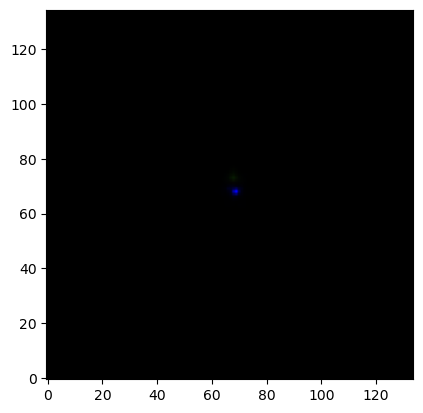

In [46]:

# Afficher l'image résultante
plt.imshow(image_rgb, origin='lower')
plt.show()
